In [1]:
fn = 'site/bytes'
with open(fn) as f:
    data = [*map(int, f.read().split())]

In [2]:
PNG = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'
len(PNG)

16

In [3]:
for i, x in enumerate(PNG):
    print(f'{x:02x}', [(q, chr(q+48)) for q, k in ((q, data[q*16+i]) for q in range(len(data) // 16)) if k == x])

89 [(4, '4')]
50 [(2, '2')]
4e [(9, '9')]
47 [(2, '2')]
0d [(1, '1'), (7, '7')]
0a [(4, '4')]
1a [(8, '8')]
0a [(0, '0')]
00 [(2, '2')]
00 [(4, '4'), (5, '5')]
00 [(7, '7'), (8, '8')]
0d [(7, '7')]
49 [(3, '3')]
48 [(6, '6')]
44 [(2, '2')]
52 [(8, '8')]


In [4]:
flag = b'4292148024773628'
xs = bytes(data[((j + flag[i] - 48) * 16 + i) % len(data)] for j in range(len(data) // 16) for i in range(16))
xs

b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01r\x00\x00\x01r\x01\x00\x00\x00\x00\xc0_l\xa4\x00\x00\x02wIDATx\x9c\xed\x9bMj\xe3@\x10F\xdf7\x12x\xd9\x02\x1f\xc0G\x91n0G\ns3\xe9(9@@\xbd4\xb4\xa8YtK\x96\xc9\x84q@Q\xacP\xb5\x10\xc2~\x98\x0f\x9a\xaa\xae?\xcb\xf8\x8c\r\xbf>\x85\x83\xf3\xce;\xef\xbc\xf3\xce;\xff\x11\xafb5R3\x89A\x92:@]\x9c\xbf\xebv\xd4\xe3\xfcV<ffFkffce\xd6\x87D~\xb3\x91\xf9mA\xfag\xd3\xef\xfcc|\x9c=\xb4}\xad\x81p\x15\xc3\xc5rr-\xa9\xde[\x8f\xf3_\xc3K\x173\x06\xd5\xf3I\x7f\xb3\x1e\xe77\xe6\xdb\xf1k\x7f\xdf\xf9]\xf9\xd9E\x83\x01\x11\x80\xa9\xa6\x1d\xcf\t\xc2U\x06\xb0n\x81<\x9b~\xe7\x1f\xe2\x07IR\x03\x10O\xe5\xd6\xed\xe2\xc9\xd41\xe5\xf4y_=\xceo\xc4\xe7\xfc\xf9f@\x95s\xe5\x7f}\xeb\xf9\xf3\xd1\xf8U}T\xae\xde\xb0TJ7(x}tl~h&\xe5c\x84I\x0c\x97\xab\xf4\x92kb\xeer\xae'\xd5\xef\xfcGV\xa2r(\x01y\x15\x9a\xfbP|\xda\xfa9f\xbb\xff\x1e\x8d\xcf\xf9\xb3\x11\x95\xd3d\rZ\x12\xe6X'#V\t\xc28\x7f\xf6l\xfa\x9d\x7f\x9c\x1f$\x99YB\x1d\xa0\x8eI\xb9\x93E\xf4\xfe\xd5A\xf9%CN\xe4\xd6s\x0f\xe5qK\xa7\xf1

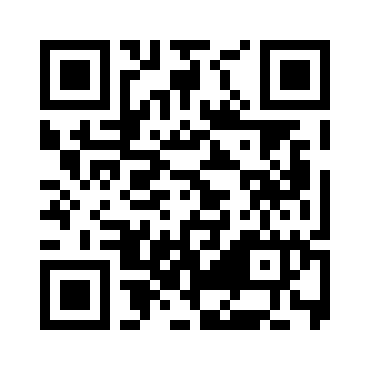

In [5]:
import io
from PIL import Image
s = io.BytesIO(xs)
im = Image.open(s)
im